# Quantiles & histograms
By the end of this lecture you will be able to:
- calculate a quantile on a `DataFrame`
- calculate a quantile on an expression
- calculate and visualise a histogram

# 分位数和直方图

本讲结束时，您将能够：

- 计算 `DataFrame` 的分位数

- 计算表达式的分位数

- 计算并可视化直方图

In [28]:
import polars as pl
import matplotlib.pyplot as plt

In [29]:
csv_file = "../../Files/Sample_Superstore.csv"

In [30]:
df = pl.read_csv(csv_file)

In [31]:
df.head(3)

Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
i64,str,str,str,str,str,str,str,str,str,str,i64,str,str,str,str,str,f64,i64,f64,f64
1,null,null,"""11-11-2016""","""Second Class""","""CG-12520""","""Claire Gute""","""Consumer""","""United States""","""Henderson""","""Kentucky""",42420,"""South""","""FUR-BO-10001798""","""Furniture""","""Bookcases""","""Bush Somerset Collection Bookc…",261.96,2,0.0,41.9136
2,"""CA-2016-152156""","""08-11-2016""","""11-11-2016""","""Second Class""","""CG-12520""","""Claire Gute""","""Consumer""","""United States""","""Henderson""","""Kentucky""",42420,"""South""","""FUR-CH-10000454""","""Furniture""","""Chairs""","""Hon Deluxe Fabric Upholstered …",731.94,3,0.0,219.582
3,"""CA-2016-138688""","""12-06-2016""",null,null,"""DV-13045""","""Darrin Van Huff""","""Corporate""",null,"""Los Angeles""","""California""",90036,"""West""","""OFF-LA-10000240""","""Office Supplies""","""Labels""","""Self-Adhesive Address Labels f…",14.62,2,0.0,6.8714


## Quantiles

### Quantiles on a `DataFrame`
We calculate quantiles on a `DataFrame` using the `quantile` function. To get the 90th percentile we do:


## 分位数

### 计算 `DataFrame` 的分位数

我们使用 `quantile` 函数计算 `DataFrame` 的分位数。要获得第 90 个百分位数，我们执行以下操作：

In [32]:
print(df.quantile(0.9))

ans = (df.select(
    pl.col(pl.Float64).quantile(0.9)
))
print(ans)

shape: (1, 21)
┌────────┬──────────┬────────────┬───────────┬───┬────────┬──────────┬──────────┬────────┐
│ Row_ID ┆ Order_ID ┆ Order_Date ┆ Ship_Date ┆ … ┆ Sales  ┆ Quantity ┆ Discount ┆ Profit │
│ ---    ┆ ---      ┆ ---        ┆ ---       ┆   ┆ ---    ┆ ---      ┆ ---      ┆ ---    │
│ f64    ┆ str      ┆ str        ┆ str       ┆   ┆ f64    ┆ f64      ┆ f64      ┆ f64    │
╞════════╪══════════╪════════════╪═══════════╪═══╪════════╪══════════╪══════════╪════════╡
│ 8995.0 ┆ null     ┆ null       ┆ null      ┆ … ┆ 572.76 ┆ 7.0      ┆ 0.4      ┆ 89.307 │
└────────┴──────────┴────────────┴───────────┴───┴────────┴──────────┴──────────┴────────┘
shape: (1, 3)
┌────────┬──────────┬────────┐
│ Sales  ┆ Discount ┆ Profit │
│ ---    ┆ ---      ┆ ---    │
│ f64    ┆ f64      ┆ f64    │
╞════════╪══════════╪════════╡
│ 572.76 ┆ 0.4      ┆ 89.307 │
└────────┴──────────┴────────┘


### Quantiles in an expression

We can also calculate quantiles as an expression

### 分位数表达式

我们也可以用表达式来计算分位数。

In [33]:
(
    df.select(
        pl.col("Profit").quantile(0.9)
    )
)

Profit
f64
89.307


### Multiple quantiles
We can calculate multiple quantiles in an expression using a list comprehension. As expressions are run in parallel this allows us to calculate multiple quantiles in parallel

### 多个分位数

我们可以使用列表推导式在表达式中计算多个分位数。由于表达式是并行运行的，这使我们能够并行计算多个分位数。

In [34]:
quantile_list = [0.1,0.5,0.9]
(
    df
    .select(
        [               # 这里使用了 列表表达式, 毕竟select只要有对应的列名就行了.
            pl.col("Profit").quantile(q).alias(f"Profit_quantile_{q}") for q in quantile_list
        ]
    )
)

Profit_quantile_0.1,Profit_quantile_0.5,Profit_quantile_0.9
f64,f64,f64
-15.4764,8.671,89.307


To calculate multiple quantiles on multiple columns we can use `name.suffix` to avoid column name collisions.

In this example we calculate multiple quantiles on all of the floating point columns

要计算多列的多个分位数，我们可以使用 `name.suffix` 来避免列名冲突。

在本例中，我们计算所有浮点列的多个分位数。

In [35]:
quantile_list = [0.1,0.5,0.9]
(
    df.select(
        [
            pl.col(pl.Float64).quantile(q).name.suffix(f"_quantile_{q}") for q in quantile_list
        ]
    )
)

Sales_quantile_0.1,Discount_quantile_0.1,Profit_quantile_0.1,Sales_quantile_0.5,Discount_quantile_0.5,Profit_quantile_0.5,Sales_quantile_0.9,Discount_quantile_0.9,Profit_quantile_0.9
f64,f64,f64,f64,f64,f64,f64,f64,f64
7.896,0.0,-15.4764,54.5,0.2,8.671,572.76,0.4,89.307


As quantiles can be calculated using a fast-track algorithm on sorted columns it may be worth sorting the columns you are calculting multiple quantiles on first

由于可以使用快速算法在已排序的列上计算分位数，因此首先对要计算多个分位数的列进行排序可能很有必要。

In [36]:
(
    df
    .select(
        pl.col(pl.Float64).sort()
    )
    .select(
        [
            pl.col(pl.Float64).quantile(q).name.suffix(f"_quantile_{q}") for q in quantile_list
        ]
    )
)

Sales_quantile_0.1,Discount_quantile_0.1,Profit_quantile_0.1,Sales_quantile_0.5,Discount_quantile_0.5,Profit_quantile_0.5,Sales_quantile_0.9,Discount_quantile_0.9,Profit_quantile_0.9
f64,f64,f64,f64,f64,f64,f64,f64,f64
7.896,0.0,-15.4764,54.5,0.2,8.671,572.76,0.4,89.307


### Interpolation strategy for quantiles
We can use different interpolation strategies for calculating quantiles:
- nearest 
- higher 
- lower 
- midpoint
- linear

### 分位数的插值策略

我们可以使用不同的插值策略来计算分位数：

- 最近值插值

- 较高值插值

- 较低值插值

- 中点插值

- 线性插值

In [37]:
df.select(
    pl.col('Profit').quantile(0.25, interpolation='nearest').alias('Profit_nearest'), # 这个参数表示: 取最近的一个值.
    pl.col('Profit').quantile(0.25, interpolation='linear').alias('Profit_linear')    # 这个参数表示: 若是没有直接值, 那么取两边的平均数.
)

Profit_nearest,Profit_linear
f64,f64
1.728,1.72875


## Histogram

### Histogram method
We can calculate a histogram on a `Series`. Here we get a histogram of the `Profit` column

## 直方图

### 直方图方法

我们可以对一个“序列”计算直方图。这里我们得到的是“利润”列的直方图。

In [38]:
(
    df["Profit"]
    .hist()
)

breakpoint,category,count
f64,cat,u32
-5099.9826,"""[-6599.978, -5099.9826]""",1
-3599.9872,"""(-5099.9826, -3599.9872]""",2
-2099.9918,"""(-3599.9872, -2099.9918]""",4
-599.9964,"""(-2099.9918, -599.9964]""",34
899.999,"""(-599.9964, 899.999]""",9907
2399.9944,"""(899.999, 2399.9944]""",35
3899.9898,"""(2399.9944, 3899.9898]""",5
5399.9852,"""(3899.9898, 5399.9852]""",4
6899.9806,"""(5399.9852, 6899.9806]""",1


The columns of the output are:
- `breakpoint` this is the right-hand value of each bin
- `category` which is a categorical column showing the range of each bin
- `count` showing the number of values in each bin

We can instead pass a `list` to specify the `bins`

输出结果包含以下列：

- `breakpoint`：每个区间右侧的值

- `category`：分类列，显示​​每个区间的范围

- `count`：显示每个区间中的值数量

我们也可以使用 `list` 来指定 `bins`。

In [39]:
(
    df['Profit']
    .hist(
        bins=list(range(0,100,10))
    )
)

breakpoint,category,count
f64,cat,u32
10.0,"""[0.0, 10.0]""",3516
20.0,"""(10.0, 20.0]""",1407
30.0,"""(20.0, 30.0]""",737
40.0,"""(30.0, 40.0]""",427
50.0,"""(40.0, 50.0]""",308
60.0,"""(50.0, 60.0]""",257
70.0,"""(60.0, 70.0]""",172
80.0,"""(70.0, 80.0]""",167
90.0,"""(80.0, 90.0]""",151


If we just want to visualise the histogram, we can use the `plot.hist` method. In this case we specify the number of bins

如果我们只想可视化直方图，可以使用 `plot.hist` 方法。在这种情况下，我们需要指定直方图的箱数。

In [40]:
df = df.filter(pl.col('Profit') > 500)

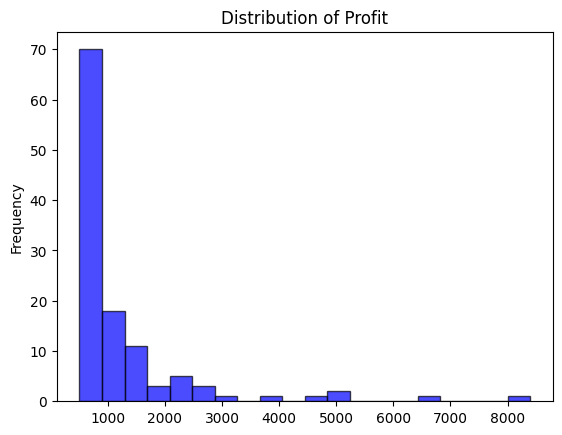

In [41]:
df_pandas = df.to_pandas()

df_pandas['Profit'].plot.hist(bins=20, color='blue', edgecolor='black', alpha=0.7, title='Distribution of Profit')

plt.show()